# BL.EN.U4CSE20011 - Lab 3

In [7]:
import numpy as np
import pandas as pd

In [8]:
df_train = pd.read_csv(r'C:\Users\anhsu\Downloads\lab3\lab3\data\train_data.csv')
df_test = pd.read_csv(r'C:\Users\anhsu\Downloads\lab3\lab3\data\test_data.csv')

In [9]:
print(df_train.head())

       AccX      AccY      AccZ     GyroX     GyroY     GyroZ   Class  \
0  0.000000  0.000000  0.000000  0.059407 -0.174707  0.101938  NORMAL   
1 -1.624864 -1.082492 -0.204183 -0.028558  0.051313  0.135536  NORMAL   
2 -0.594660 -0.122410  0.220502 -0.019395 -0.029322  0.087888  NORMAL   
3  0.738478 -0.228456  0.667732  0.069791 -0.029932  0.054902  NORMAL   
4  0.101741  0.777568 -0.066730  0.030696 -0.003665  0.054902  NORMAL   

   Timestamp  
0    3581629  
1    3581630  
2    3581630  
3    3581631  
4    3581631  


In [10]:
print(df_test.head())

       AccX      AccY      AccZ     GyroX     GyroY     GyroZ       Class  \
0  0.758194 -0.217791  0.457263  0.000000  0.000000  0.000000  AGGRESSIVE   
1  0.667560 -0.038610  0.231416 -0.054367 -0.007712  0.225257  AGGRESSIVE   
2  2.724449 -7.584121  2.390926  0.023824  0.013668 -0.038026  AGGRESSIVE   
3  2.330950 -7.621754  2.529024  0.056810 -0.180587 -0.052076  AGGRESSIVE   
4  2.847215 -6.755621  2.224640 -0.031765 -0.035201  0.035277  AGGRESSIVE   

   Timestamp  
0     818922  
1     818923  
2     818923  
3     818924  
4     818924  


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [13]:
df_train.drop(['Timestamp'], axis=1, inplace=True)
df_test.drop(['Timestamp'], axis=1, inplace=True)

In [14]:
print(df_train['Class'].unique())
print(df_test['Class'].unique())

['NORMAL' 'AGGRESSIVE' 'SLOW']
['AGGRESSIVE' 'NORMAL' 'SLOW']


In [15]:
df_train['Class']=df_train['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])
df_test['Class']=df_test['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])

- 0: Non aggressive
- 1: Aggressive

<AxesSubplot:xlabel='Class'>

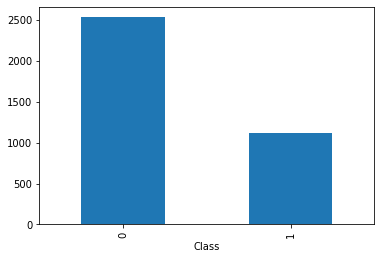

In [16]:
df_train.groupby('Class')['Class'].count().plot.bar()

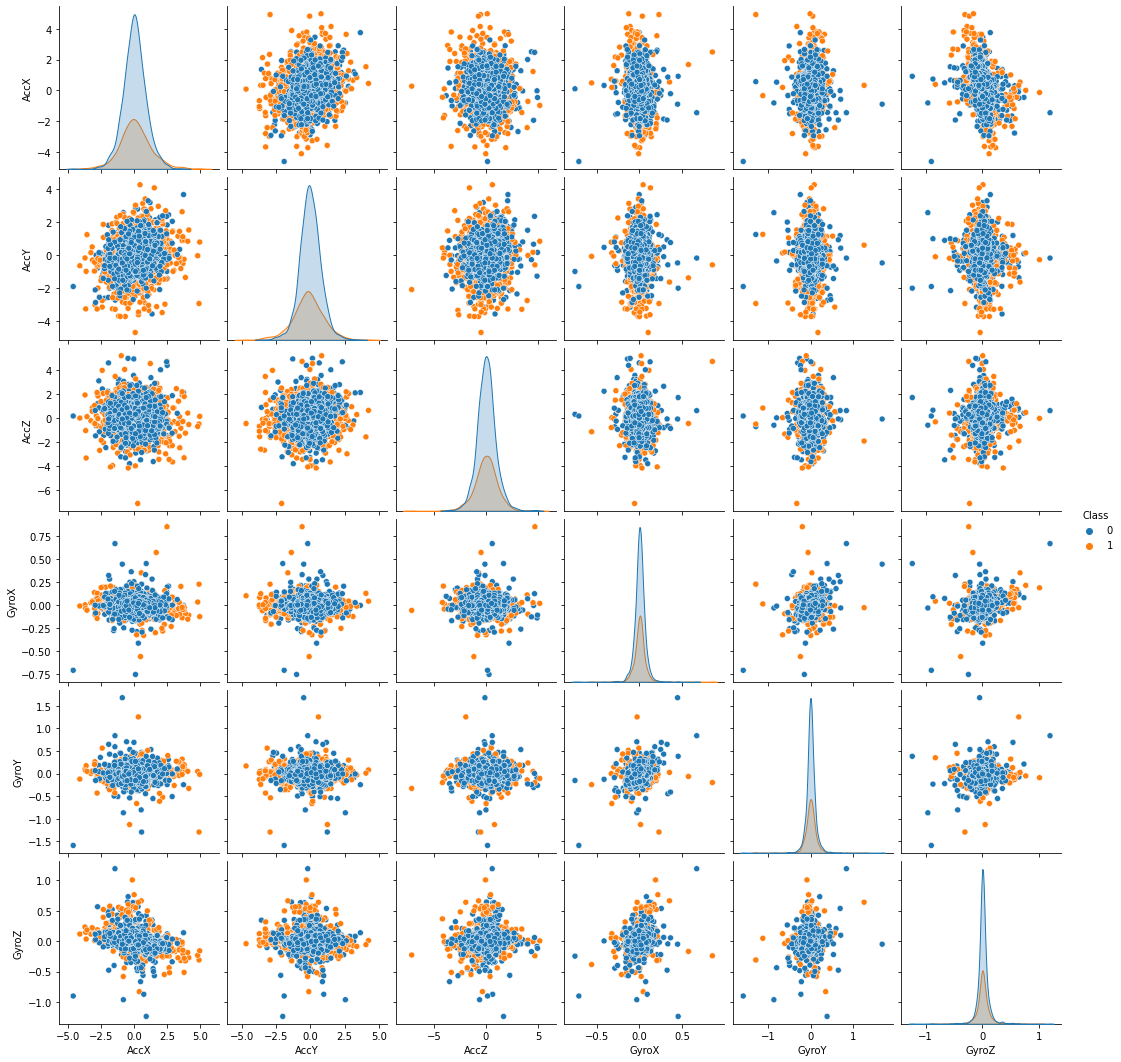

In [17]:
import seaborn as sns
sns.pairplot(df_train, hue='Class')

<AxesSubplot:>

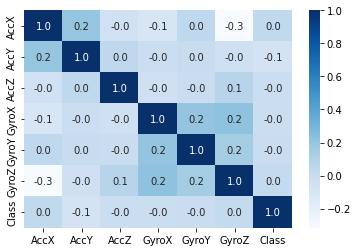

In [18]:
sns.heatmap(df_train.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f')

## A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes, you can take any two classes.

In [19]:
class_non_aggression = df_train.loc[df_train['Class'] == 0][['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].to_numpy()
class_aggression = df_train.loc[df_train['Class'] == 1][['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].to_numpy()


In [20]:
class_non_aggression_spread = class_non_aggression.std()
class_aggression_spread = class_aggression.std()

print("Non aggression class:", class_non_aggression_spread)
print("Aggression class:", class_aggression_spread)

Non aggression class: 0.6071313254078544
Aggression class: 0.8297243996066321


In [21]:
class_non_aggression_centroid = class_non_aggression.mean(axis=0)
class_aggression_centroid = class_aggression.mean(axis=0)

print("Non aggression class centroid:", class_non_aggression_centroid)
print("Aggression class centroid:", class_aggression_centroid)

Non aggression class centroid: [ 0.01600841 -0.03074401  0.02120687  0.00219191 -0.0005638   0.006564  ]
Aggression class centroid: [ 0.0960864  -0.17046062 -0.02114434  0.0002301  -0.00288583  0.01109869]


In [22]:
inter_class_distance = np.linalg.norm(class_non_aggression_centroid - class_aggression_centroid)
print("Inter class distance:", inter_class_distance)

Inter class distance: 0.16660325678173804


## A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data.

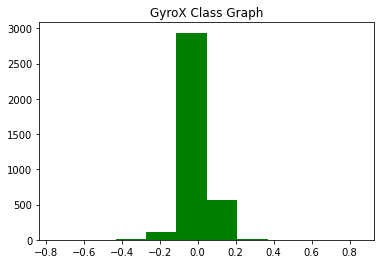

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df_train["GyroX"],facecolor='green')
plt.title('GyroX Class Graph')
plt.show()

In [39]:
print('GyroX Mean:',df_train["GyroX"].mean())
print('GyroX std:',df_train["GyroX"].std())

GyroX Mean: 0.0015927086780241492
GyroX std: 0.06691773602595638


## A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10. Make a plot of the distance and observe the nature of this graph.

In [48]:
from math import *
from decimal import Decimal
def my_p_root(value, root):
   my_root_value = 1 / float(root)
   return round (Decimal(value) **
   Decimal(my_root_value), 3)
def minkowski_distance(x, y, r):
   return (my_p_root(sum(pow(abs(a-b), r)
      for a, b in zip(x, y)), r))


vector_1=df_train["GyroX"].to_numpy()
vector_2=df_train["GyroY"].to_numpy()
for i in range(1,11):
    print("r =",i)
    print("The Distance is:",minkowski_distance(vector_1, vector_2, i))
    


r = 1
The Distance is: 306.672
r = 2
The Distance is: 7.840
r = 3
The Distance is: 3.062
r = 4
The Distance is: 2.242
r = 5
The Distance is: 1.968
r = 6
The Distance is: 1.838
r = 7
The Distance is: 1.763
r = 8
The Distance is: 1.715
r = 9
The Distance is: 1.681
r = 10
The Distance is: 1.657


## A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train-test_split() function available in SciKit.

In [49]:
df_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,0
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,0
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,0
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,0
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,0


In [56]:
from sklearn.model_selection import train_test_split
X=df_train[["AccX","AccY","AccZ","GyroX","GyroY","GyroZ"]]
y=df_train["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. 

In [59]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)


KNeighborsClassifier(n_neighbors=3)

# A6. Test the accuracy of the kNN using the test set obtained from above exercise.

In [60]:
neigh.score(X_test,y_test)

0.8117001828153565

# A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [63]:
test_vect=neigh.predict(X_test)
test_vect

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

In [67]:
neigh_new = KNeighborsClassifier(n_neighbors=1)
neigh_new.fit(X,y)
neigh_new.predict(X_test)

print("KNN score with k=1:",neigh_new.score(X_test,y_test))
print("KNN score with k=3:",neigh.score(X_test,y_test))
#k=1 is over fitting

KNN score with k=1: 1.0
KNN score with k=3: 0.8117001828153565
